In [3]:
# import libraries nescessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import  auc, roc_auc_score, roc_curve, f1_score, recall_score 
from imblearn.over_sampling import SMOTE  # Import SMOTE


In [4]:
# load the dataset into a dataframe
df_credit = pd.read_csv('creditcard.csv')

# inspect the dataframe
print(df_credit.head())
print(df_credit.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
# get information about the dataframe
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# print the summary statistics about the dataframe
print(df_credit[['Time', 'Amount', 'V1', 'V28', 'Class']].describe())

                Time         Amount            V1           V28          Class
count  284807.000000  284807.000000  2.848070e+05  2.848070e+05  284807.000000
mean    94813.859575      88.349619  1.168375e-15 -1.227390e-16       0.001727
std     47488.145955     250.120109  1.958696e+00  3.300833e-01       0.041527
min         0.000000       0.000000 -5.640751e+01 -1.543008e+01       0.000000
25%     54201.500000       5.600000 -9.203734e-01 -5.295979e-02       0.000000
50%     84692.000000      22.000000  1.810880e-02  1.124383e-02       0.000000
75%    139320.500000      77.165000  1.315642e+00  7.827995e-02       0.000000
max    172792.000000   25691.160000  2.454930e+00  3.384781e+01       1.000000


In [9]:
# inspect the columns that are not the transaction amount 
print(df_credit[['Time', 'Amount', 'Class']].head())

# inspect the number of fraudulent transactions
print(df_credit['Class'].value_counts())
# if the class is 1, then the transaction is fraudulent else it is not

   Time  Amount  Class
0   0.0  149.62      0
1   0.0    2.69      0
2   1.0  378.66      0
3   1.0  123.50      0
4   2.0   69.99      0
Class
0    284315
1       492
Name: count, dtype: int64


Text(0.5, 1.0, 'Count of Fraudulent vs Non-Fraudulent Transactions')

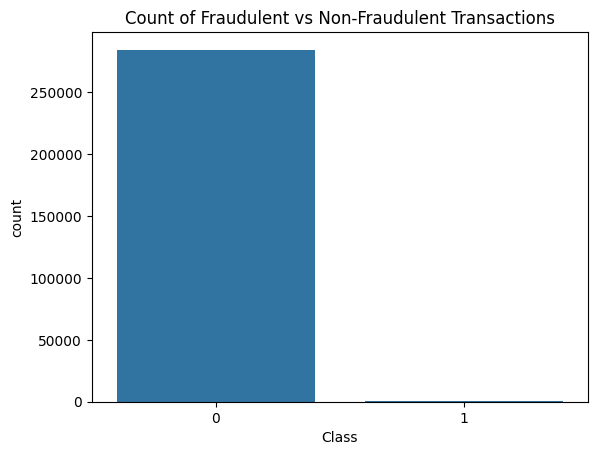

In [12]:
# visualize the data for fraud and non-fraud transactions
sns.countplot(x='Class', data=df_credit)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')

Text(0.5, 1.0, 'Transaction Amount by Class')

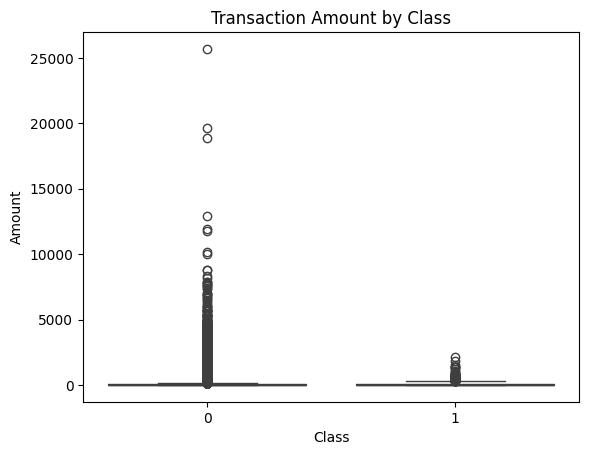

In [13]:
# visualize the transaction amount by class
sns.boxplot(x='Class', y='Amount', data=df_credit)
plt.title('Transaction Amount by Class')

Text(0.5, 1.0, 'Transaction Time by Class')

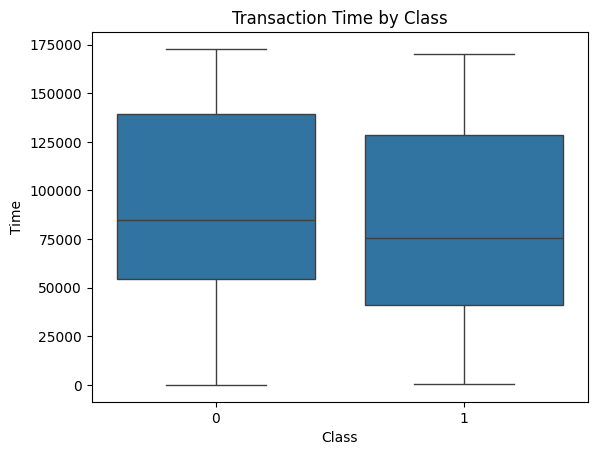

In [14]:
# visualize the transaction time by class
sns.boxplot(x='Class', y='Time', data=df_credit)
plt.title('Transaction Time by Class')

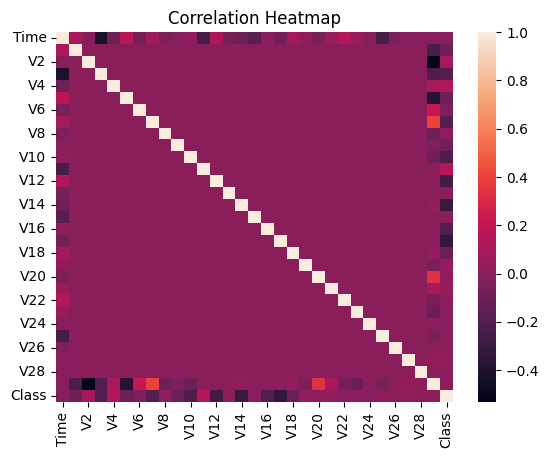

In [15]:
# visualize the correlation heatmap for the dataset
sns.heatmap(df_credit.corr())
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# split the data into train and test
X = df_credit.drop('Class', axis=1).values
y = df_credit['Class'].values

print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=42)



(284807, 30) (284807,)


In [17]:
# inspect the number of fraudulent transactions
print(df_credit['Class'].value_counts())

# Assuming X_train and y_train are your training features and labels
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(X_resampled.shape, y_resampled.shape)

Class
0    284315
1       492
Name: count, dtype: int64
(454902, 30) (454902,)


In [18]:
# Optional: Standardize the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)


In [19]:
# intialize the models
randforest = RandomForestClassifier(random_state=42)

# make a parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# train the models
randforest = RandomizedSearchCV(randforest, param_grid, n_iter=5, cv=3, scoring='roc_auc', random_state=42,  n_jobs=-1)
randforest.fit(X_resampled, y_resampled)

print("Best parameters for RandomForestClassifier:", randforest.best_params_)

# Train the RandomForestClassifier with the best parameters
best_rf = randforest.best_estimator_


Best parameters for RandomForestClassifier: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


In [20]:
# # Logistic Regression Hyperparameter Tuning using RandomizedSearchCV
param_dist_lr = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
}

# RandomizedSearchCV for LogisticRegression
lr_classifier = LogisticRegression(random_state=42)
lr_random_search = RandomizedSearchCV(lr_classifier, param_distributions=param_dist_lr, n_iter=5, cv=3, scoring='roc_auc', random_state=42, n_jobs=-1)
lr_random_search.fit(X_train, y_train)

print("Best parameters for LogisticRegression:", lr_random_search.best_params_)

# Train the LogisticRegression with the best parameters
best_lr = lr_random_search.best_estimator_



Best parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100}


Best parameters for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Best parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100}

In [21]:
best_rf.fit(X_resampled, y_resampled)
best_lr.fit(X_resampled, y_resampled)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

Accuracy: 0.9982
ROC AUC Score: 0.9864
f1_score: 0.6327
Recall: 0.8878
confusion_matrix:
 [[56774    90]
 [   11    87]]


<Figure size 800x600 with 0 Axes>

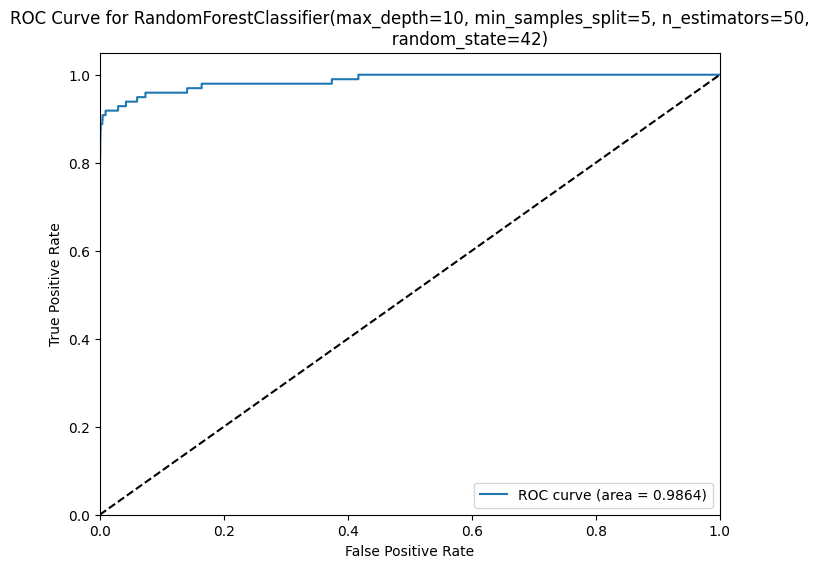

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_rf = best_rf.predict(X_test)
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Use accuracy_score function
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")
print(f'f1_score: {f1_score(y_test, y_pred_rf):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_rf):.4f}')
print(f'confusion_matrix:\n {confusion_matrix(y_test, y_pred_rf)}')
# Plot ROC Curve
plt.figure(figsize=(8, 6))

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_rf}')
plt.legend(loc="lower right")
plt.show()

In [23]:
y_pred_lr = best_lr.predict(X_test)
y_pred_prob_lr = best_lr.predict_proba(X_test)[:, 1]
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

Accuracy: 0.9899
ROC AUC Score: 0.9770
f1_score: 0.23404255319148937
recall_score: 0.8979591836734694
confusion_matrix: 
 [[56298   566]
 [   10    88]]


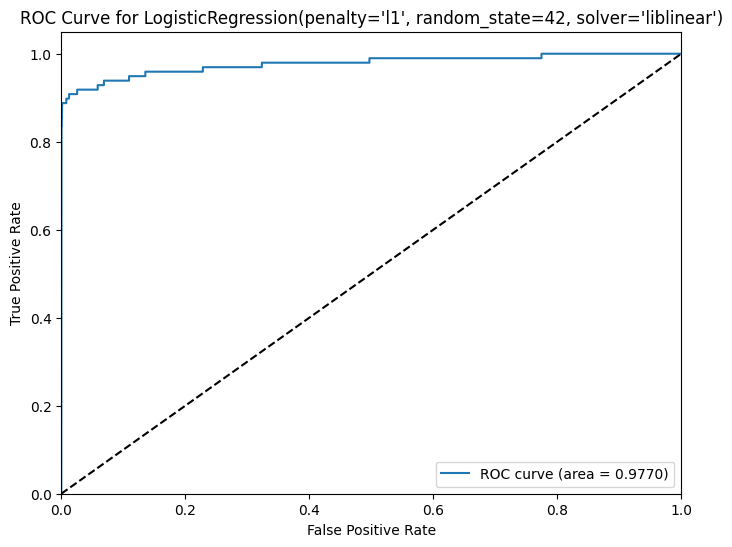

In [25]:
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"ROC AUC Score: {roc_auc_lr:.4f}")
print(f'f1_score: {f1_score(y_test, y_pred_lr)}')
print(f'recall_score: {recall_score(y_test, y_pred_lr)}')
print(f'confusion_matrix: \n {confusion_matrix(y_test, y_pred_lr)}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_lr}')
plt.legend(loc="lower right")
plt.show()